Проверка статистических гипотез.

###### Шарифов Фаррух Рустамович N33472

#### Задача 1. Nursing Home Data

Сравнить росходы больниц  расположенных за городом и в городе (в сотнях долларов), за год.

In [25]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#  matplotlib.style.use('ggplot')
%matplotlib inline

In [26]:
from scipy import stats

In [27]:
df = pd.read_csv('Nursing_Home_Data_data.dat', sep="\s+" )
df.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


In [28]:
x = df[df['RURAL'] == 1]['FEXP']
y = df[df['RURAL'] == 0]['FEXP']
x.name, y.name = 'rural', 'non-rural'
x

1      493
5      449
6     4998
7      966
9     6442
11    3360
13    1280
14    1123
15    5206
16    4443
17    4585
18    1675
19    5686
22    1756
24    4531
25    2543
26    4446
28    2987
29     411
32    1209
33     137
35    1273
37    2561
38    3874
39    6402
40    1911
41    1122
42    3893
43    2212
44    2959
45    3006
47    1242
48    1484
50     245
Name: rural, dtype: int64

Проверяем нормальность распределений

In [29]:
def Histograms(x, y):

    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

вызываем функцию для определённых выше векторов x, y.

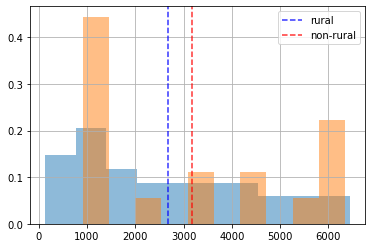

In [30]:
Histograms(x, y)

Диаграмма Ящик с Усами!

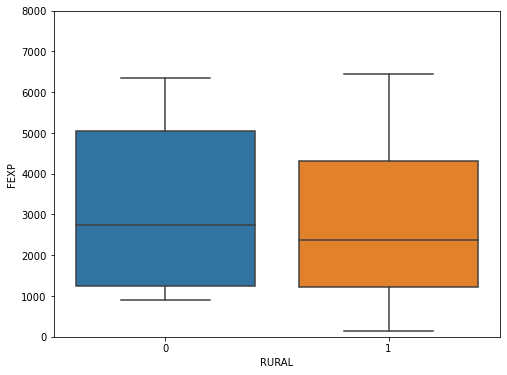

In [34]:
var = 'RURAL'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df[var], y=df['FEXP'])
fig.axis(ymin=0, ymax=8000);

В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (больницы). Поэтому нам остаётся критерий Манна-Уитни.

In [8]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.26594759448891914


#### Вывод
p-value получился больше  𝛼=0.01, 0.05, поэтому мы не отвергнаем гипотезу. Вывод: расход больныц отличается не значительно  в зависимости от типа больницы.

#### Задача 2. Unions and State Labor Law.


Cравниваются штаты, в которых принят закон State right-to-work law
и те, в которых закон не принят.

In [12]:
df_2 = pd.read_csv('Unions and State Labor Law_data.dat', encoding='utf-8', sep='\s+', index_col='STATE')
df_2.head()

,DENS,COMP,RTW,PVT
STATE,,,,
NY,56.9,1,0,31.2
MI,49.6,1,0,30.2
WA,32.4,1,0,33.1
HI,54.6,1,0,24.7
AK,30.7,1,0,30.1


In [14]:
x = df_2[df_2['RTW'] == 1]['DENS']
y = df_2[df_2['RTW'] == 0]['DENS']
x.name, y.name = 'employees', 'not employees'

вызываем функцию для определённых выше векторов x, y.

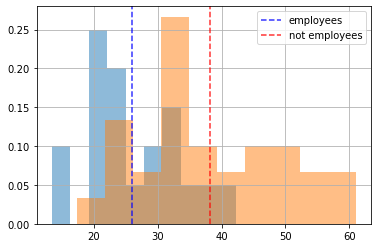

In [15]:
Histograms(x, y)

Диаграмма Ящик с Усами!

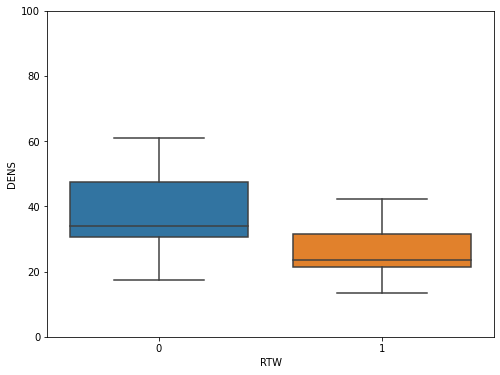

In [39]:
var = 'RTW'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_2[var], y=df_2['DENS'])
fig.axis(ymin=0, ymax=100);

Аналогично первой задаче. Имеются выбросы не дающие применить критерий Стюдента. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (штаты). Поэтому нам остаётся критерий Манна-Уитни.

In [16]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.00010624487970362637


#### Вывод
p-value получился маленьким (меньше 𝛼=0.01, 0.05 ), поэтому мы отвергнаем гипотезу. Вывод: процент муниципальных служащих, состоящих в профсоюзах отличаются.
